In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime as dt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#seperatting datetime into date and tiime

train_df['Hour'] = pd.to_datetime(train_df['datetime']).dt.hour
train_df['Day'] =  pd.to_datetime(train_df['datetime']).dt.day
train_df['Month'] =  pd.to_datetime(train_df['datetime']).dt.month
train_df['Year'] =  pd.to_datetime(train_df['datetime']).dt.year

test_df['Hour'] = pd.to_datetime(test_df['datetime']).dt.hour
test_df['Day'] =  pd.to_datetime(test_df['datetime']).dt.day
test_df['Month'] =  pd.to_datetime(test_df['datetime']).dt.month
test_df['Year'] =  pd.to_datetime(test_df['datetime']).dt.year

#  one hot encoding
encoder = OneHotEncoder(handle_unknown = "ignore")

encoder_df = pd.DataFrame(encoder.fit_transform(train_df[['var2']]).toarray())
train_df = train_df.join(encoder_df)
train_df.rename(columns = {0:'var2_A'}, inplace = True)
train_df.rename(columns = {1:'var2_B'}, inplace = True)
train_df.rename(columns = {2:'var2_C'}, inplace = True)
train_df = train_df.drop(columns = ['var2'])

encoder_tdf = pd.DataFrame(encoder.fit_transform(test_df[['var2']]).toarray())
test_df = test_df.join(encoder_df)
test_df.rename(columns = {0:'var2_A'}, inplace = True)
test_df.rename(columns = {1:'var2_B'}, inplace = True)
test_df.rename(columns = {2:'var2_C'}, inplace = True)
test_df = test_df.drop(columns = ['var2'])

#Dropping columns
X_train = train_df.drop(columns=['electricity_consumption','datetime','ID'])
test_df = test_df.drop(columns=['datetime','ID'])
Y_train = train_df['electricity_consumption'].values

#Splitting Train data into training and validation set
#method 1
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.3, random_state = 11, shuffle = False)

#method 2
train_final = []
for x in range(1,17):
  train_final.append(train_df.where(train_df['Day']==x).dropna())
train_final = pd.concat(train_final, ignore_index=True)

validation = []
for x in range(17,24):
  validation.append(train_df.where(train_df['Day']==x).dropna())
validation = pd.concat(validation,ignore_index=True)
train_y = train_final['electricity_consumption']
valid_y = validation['electricity_consumption']

train_final = train_final.drop(columns=['electricity_consumption','datetime','ID'])
validation = validation.drop(columns=['electricity_consumption','datetime','ID'])

#Normalising the values for both models
minmax = MinMaxScaler()
minmax.fit(X_train)
x_train_rfr = minmax.transform(x_train)
x_test_rfr = minmax.transform(x_test)

scaler = StandardScaler()
scaler.fit(X_train)
x_train_ss = scaler.transform(x_train)
x_test_ss = scaler.transform(x_test)

In [21]:
# creating an object of LinearRegression class
LR = LinearRegression(fit_intercept=True)
# fitting the training data
LR.fit(train_final,train_y)

y_prediction =  LR.predict(validation)
y_prediction

# predicting the accuracy score
score=r2_score(valid_y,y_prediction)
print('r2 score for Linear Regression model is =',score)
print('mean_sqrd_error of Linear Regression model is =',mean_squared_error(valid_y,y_prediction))
print('root_mean_squared error of Linear Regression model is =',np.sqrt(mean_squared_error(valid_y,y_prediction)))
print('Absolute error of Linear Regression model is =',mean_absolute_error(valid_y,y_prediction))
print(' ')

r2 score for Linear Regression model is = 0.22924678886260808
mean_sqrd_error of Linear Regression model is = 10976.28992055669
root_mean_squared error of Linear Regression model is = 104.7677904728199
Absolute error of Linear Regression model is = 74.81480634039269
 


In [22]:
# creating an object of LinearRegression class
LR = LinearRegression(fit_intercept=True)
# fitting the training data
LR.fit(x_train_ss,y_train)

y_prediction =  LR.predict(x_test_ss)
y_prediction

# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score for Linear Regression model is =',score)
print('mean_sqrd_error of Linear Regression model is =',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of Linear Regression model is =',np.sqrt(mean_squared_error(y_test,y_prediction)))
print('Absolute error of Linear Regression model is =',mean_absolute_error(y_test,y_prediction))
print(' ')

r2 score for Linear Regression model is = 0.19144196167839844
mean_sqrd_error of Linear Regression model is = 9994.821692900772
root_mean_squared error of Linear Regression model is = 99.97410511177767
Absolute error of Linear Regression model is = 69.30328307672265
 


In [3]:
#random forest
model = RandomForestRegressor(n_estimators=1000, random_state=1,min_samples_leaf=50)
model.fit(x_train_rfr, y_train)
# make predictions
y_preds = model.predict(x_test_rfr)

# evaluate predictions
#score=model.score(y_test,yhat)
print('r2 score of Random Forest Regressor is ',r2_score(y_test,y_preds))
print('mean_sqrd_error of Random Forest Regressor is =',mean_squared_error(y_test,y_preds))
print('root_mean_squared error of Random Forest Regressor is =',np.sqrt(mean_squared_error(y_test,y_preds)))
print('Absolute error of Random Forest Regressor is =',mean_absolute_error(y_test,y_preds))

r2 score of Random Forest Regressor is  0.42159264195858803
mean_sqrd_error of Random Forest Regressor is = 7149.862020401213
root_mean_squared error of Random Forest Regressor is = 84.55685673203098
Absolute error of Random Forest Regressor is = 57.88974485451631


In [207]:
#random forest
model = RandomForestRegressor(n_estimators=1000, random_state=1,min_samples_leaf=50)
model.fit(train_final,train_y)
# make predictions
y_preds = model.predict(validation)

# evaluate predictions
#score=model.score(y_test,yhat)
print('r2 score of Random Forest Regressor is ',r2_score(valid_y,y_preds))
print('mean_sqrd_error of Random Forest Regressor is =',mean_squared_error(valid_y,y_preds))
print('root_mean_squared error of Random Forest Regressor is =',np.sqrt(mean_squared_error(valid_y,y_preds)))
print('Absolute error of Random Forest Regressor is =',mean_absolute_error(valid_y,y_preds))

r2 score of Random Forest Regressor is  0.3233233974327353
mean_sqrd_error of Random Forest Regressor is = 9636.545738518667
root_mean_squared error of Random Forest Regressor is = 98.16590924816347
Absolute error of Random Forest Regressor is = 66.67174528289873


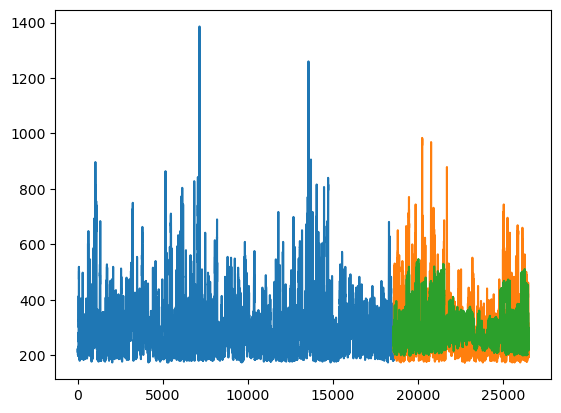

In [24]:
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_test])
pyplot.plot([None for i in y_train] + [x for x in y_preds])
pyplot.show()

In [16]:
#Submitting the predictions to a csfv file on the test data.
minmax.fit(test_df)
X_test = minmax.transform(test_df)

y_preds = model.predict(X_test)

sub = {"ID": [f"{i}" for i in range(len(test_df))],
       "Predictions": y_preds}
sub_df = pd.DataFrame(sub)
sub_df.to_csv(f"{22224253}.csv", sep=",", header=1, index=None)